In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input//kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv')

/tmp/ipykernel_33/3108853061.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv')


In [4]:
df.shape

(7461195, 13)

In [5]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [6]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [7]:
# Cleaning up the data

df[df['Athlete country'] == 'USA']


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
60,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,12:32:16 h,"*Olaton, KY",USA,1995.0,M,MU23,6.418,60
61,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,12:39:36 h,"*Wyoming, MI",USA,1979.0,M,M35,6.356,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [8]:
df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [9]:
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [12]:
# Combine all filters together

df2 = df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]


In [13]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:42:06 h,"*Seattle, WA",USA,1985.0,F,W23,10.635,810282
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:49:20 h,"*Camano Island, WA",USA,1961.0,M,M55,10.369,11739
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:49:50 h,"*Clinton, WA",USA,1970.0,M,M45,10.351,80394
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:51:00 h,"*Seattle, WA",USA,1975.0,F,W40,10.309,140909
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,5:02:35 h,"*Sammamish, WA",USA,1979.0,M,M40,9.915,753889


In [14]:
df2.shape

(26090, 13)

In [15]:
# Remove (USA) from event name
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

/tmp/ipykernel_33/509199038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


In [16]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [19]:
#Clean up Athelete Age
df2['Athlete age'] = df2['Year of event'] - df2['Athlete year of birth']

/tmp/ipykernel_33/3818409187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete age'] = df2['Year of event'] - df2['Athlete year of birth']


In [20]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [21]:
# Remove the 'h' from 'Athlete performance'
df2['Athlete performance'] = df2['Athlete performance'].str.split(' h').str.get(0)

/tmp/ipykernel_33/1405725822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' h').str.get(0)


In [22]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [24]:
#Drop less prominant columns which are not required for analysis

#Athlete Club, Athlete Country, Athlete year of birth, Athlete age category

df2 = df2.drop(['Athlete country','Athlete year of birth','Athlete club','Athlete age category'], axis=1)

In [26]:
df2.shape

(26090, 10)

In [27]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [29]:
#Handle null/missing values in the dataset

df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete age                  233
dtype: int64

In [30]:
df2[df2['Athlete age'].isna() == 1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [31]:
df2 = df2.dropna()

In [32]:
df2.shape

(25857, 10)

In [36]:
#check for duplicates
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age


In [37]:
#reset index
df2.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


In [38]:
#change data types of certain variables
df2.dtypes


Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete age                  float64
dtype: object

In [39]:
df2['Athlete age'] = df2['Athlete age'].astype(int)

/tmp/ipykernel_33/4004491416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete age'] = df2['Athlete age'].astype(int)


In [40]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype('float')

/tmp/ipykernel_33/315832216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete average speed'] = df2['Athlete average speed'].astype('float')


In [41]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Athlete age                    int64
dtype: object

In [45]:
#Rename Columns

df2 = df2.rename(columns = {
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',
    'Event distance/length': 'race_length',
    'Event number of finishers': 'race_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID':'athlete_id'
})

In [46]:

df2.dtypes


year                          int64
race_day                     object
race_name                    object
race_length                  object
race_number_of_finishers      int64
athlete_performance          object
athlete_gender               object
athlete_average_speed       float64
athlete_id                    int64
Athlete age                   int64
dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race_length', ylabel='Count'>

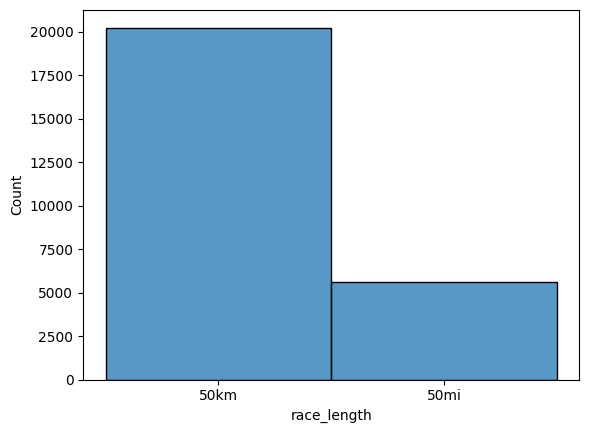

In [47]:
#find the charts and graph insights for 2 races in 2020 - Sarasota | Everglades

sns.histplot(df2['race_length'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='race_length', ylabel='Count'>

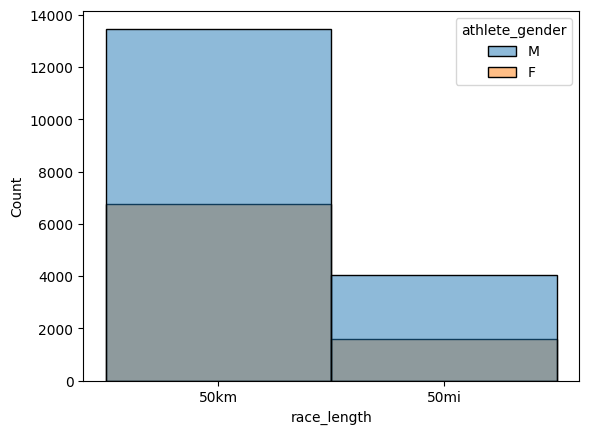

In [49]:
sns.histplot(df2, x='race_length', hue='athlete_gender' )

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


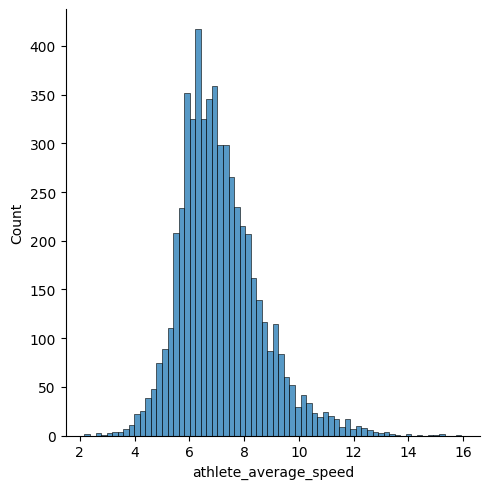

In [50]:
sns.displot(df2[df2['race_length'] == '50mi']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

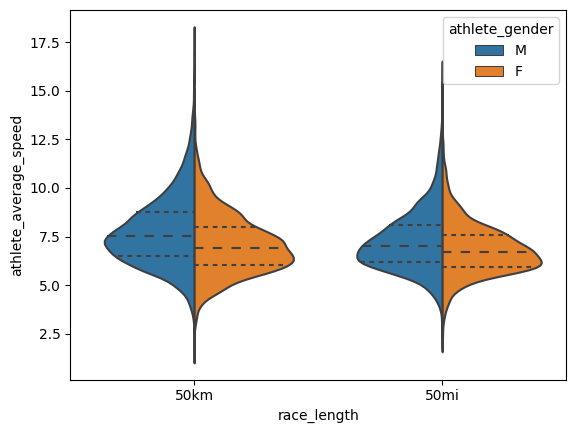

In [53]:
sns.violinplot(data=df2, x='race_length', y='athlete_average_speed', hue='athlete_gender', split=True,inner='quart')

In [54]:
#Questions I want to find out from the data

In [55]:
#Difference in speed for the 50k, 50mi male to female
df2.groupby(['race_length','athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

In [56]:
#Seasons for the data -> Slower in summer than winter

#Spring 3-5
#Summer 6-8
#fall 9-11
#winter 12-2

#Split between two decimals

In [60]:
df2['race_month'] = df2['race_day'].str.split('.').str.get(1).astype(int)

In [61]:
df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,Athlete age,race_month
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29,2
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39,2
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21,2
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37,2
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43,2


In [62]:
df2['race_season'] = df2['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x>8 else 'Summer' if x>5 else 'Spring' if x>2 else 'Winter')

In [63]:
df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,Athlete age,race_month,race_season
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29,2,Winter
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39,2,Winter
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21,2,Winter
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37,2,Winter
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43,2,Winter


In [64]:
df2.groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


In [65]:
#50 miler only

df2.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.048442,1977
Summer,6.505776,817


In [66]:
#50mk only

#50 miler only

df2.query('race_length == "50km"').groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Spring,7.889135,2458
Winter,7.614744,9618
Fall,7.373441,6318
Summer,7.031116,1836
